In [107]:
!pwd


/kaggle/input/nfl2021-train-images/train_images


trying to train an image from ../input/nfl2021-train-images

In [106]:
%cd ../../input/nfl2021-train-images/train_images/

/kaggle/input/nfl2021-train-images/train_images


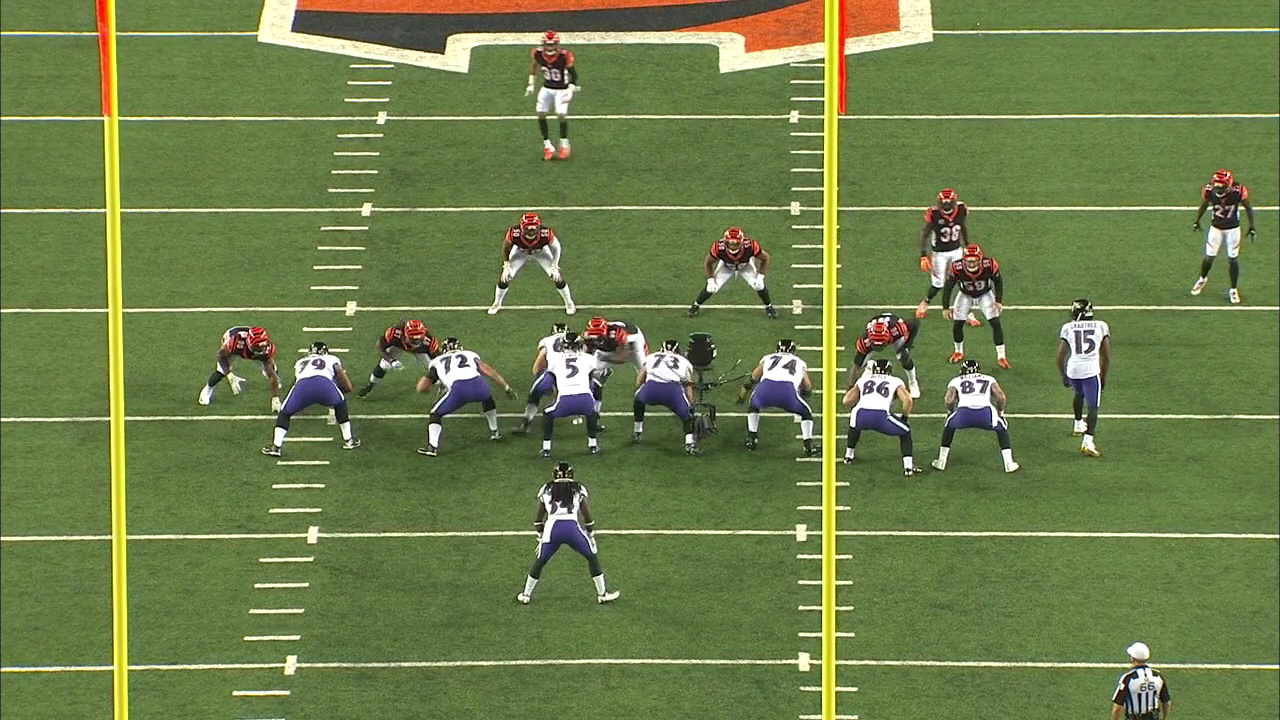

In [108]:

from PIL import Image
import cv2
im = Image.open('57583_000082_Endzone_frame0028.jpg')
img = cv2.imread('57583_000082_Endzone_frame0028.jpg')
im

In [59]:
pwd

'/kaggle/input/nfl2021-train-images/train_images'

cloning the detectron2 library from facebookresearch

In [12]:
!git clone https://github.com/facebookresearch/detectron2.git
%cd detectron2
!python -m pip install -e ./

Cloning into 'detectron2'...
remote: Enumerating objects: 13388, done.
remote: Counting objects: 100% (889/889), done.
remote: Compressing objects: 100% (449/449), done.
remote: Total 13388 (delta 555), reused 704 (delta 434), pack-reused 12499
Receiving objects: 100% (13388/13388), 5.72 MiB | 17.14 MiB/s, done.
Resolving deltas: 100% (9515/9515), done.
/kaggle/working/detectron2
Obtaining file:///kaggle/working/detectron2
     |████████████████████████████████| 49 kB 3.7 MB/s  eta 0:00:01
     |████████████████████████████████| 74 kB 2.8 MB/s  eta 0:00:01
     |████████████████████████████████| 145 kB 43.9 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 57.4 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 48.7 MB/s eta 0:00:01
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211023-py3-none-any.whl size=60947 sha256=f8480bc644308eed3fbd355b18f720bd1514d55be20e8cc8da77a2dacc2ac7ac
  Stored in directory: /root/.cache/pip/wheels/16/98/fc/252d62cab62

register dataset code

In [88]:
%%writefile detectron2/data/datasets/builtin.py

# -*- coding: utf-8 -*-
# Copyright (c) Facebook, Inc. and its affiliates.


"""
This file registers pre-defined datasets at hard-coded paths, and their metadata.

We hard-code metadata for common datasets. This will enable:
1. Consistency check when loading the datasets
2. Use models on these standard datasets directly and run demos,
   without having to download the dataset annotations

We hard-code some paths to the dataset that's assumed to
exist in "./datasets/".

Users SHOULD NOT use this file to create new dataset / metadata for new dataset.
To add new dataset, refer to the tutorial "docs/DATASETS.md".
"""

import os

from detectron2.data import DatasetCatalog, MetadataCatalog

from .builtin_meta import ADE20K_SEM_SEG_CATEGORIES, _get_builtin_metadata
from .cityscapes import load_cityscapes_instances, load_cityscapes_semantic
from .cityscapes_panoptic import register_all_cityscapes_panoptic
from .coco import load_sem_seg, register_coco_instances
from .coco_panoptic import register_coco_panoptic, register_coco_panoptic_separated
from .lvis import get_lvis_instances_meta, register_lvis_instances
from .pascal_voc import register_pascal_voc

# ==== Predefined datasets and splits for COCO ==========

_PREDEFINED_SPLITS_COCO = {}
_PREDEFINED_SPLITS_COCO["coco"] = {
    "coco_2014_train": ("coco/train2014", "coco/annotations/instances_train2014.json"),
    "coco_2014_val": ("coco/val2014", "coco/annotations/instances_val2014.json"),
    "coco_2014_minival": ("coco/val2014", "coco/annotations/instances_minival2014.json"),
    "coco_2014_minival_100": ("coco/val2014", "coco/annotations/instances_minival2014_100.json"),
    "coco_2014_valminusminival": (
        "coco/val2014",
        "coco/annotations/instances_valminusminival2014.json",
    ),
    "coco_2017_train": ("coco/train2017", "coco/annotations/instances_train2017.json"),
    "coco_2017_val": ("coco/val2017", "coco/annotations/instances_val2017.json"),
    "coco_2017_test": ("coco/test2017", "coco/annotations/image_info_test2017.json"),
    "coco_2017_test-dev": ("coco/test2017", "coco/annotations/image_info_test-dev2017.json"),
    "coco_2017_val_100": ("coco/val2017", "coco/annotations/instances_val2017_100.json"),
}

_PREDEFINED_SPLITS_COCO["coco_person"] = {
    "keypoints_coco_2014_train": (
        "coco/train2014",
        "coco/annotations/person_keypoints_train2014.json",
    ),
    "keypoints_coco_2014_val": ("coco/val2014", "coco/annotations/person_keypoints_val2014.json"),
    "keypoints_coco_2014_minival": (
        "coco/val2014",
        "coco/annotations/person_keypoints_minival2014.json",
    ),
    "keypoints_coco_2014_valminusminival": (
        "coco/val2014",
        "coco/annotations/person_keypoints_valminusminival2014.json",
    ),
    "keypoints_coco_2014_minival_100": (
        "coco/val2014",
        "coco/annotations/person_keypoints_minival2014_100.json",
    ),
    "keypoints_coco_2017_train": (
        "coco/train2017",
        "coco/annotations/person_keypoints_train2017.json",
    ),
    "keypoints_coco_2017_val": ("coco/val2017", "coco/annotations/person_keypoints_val2017.json"),
    "keypoints_coco_2017_val_100": (
        "coco/val2017",
        "coco/annotations/person_keypoints_val2017_100.json",
    ),
}


_PREDEFINED_SPLITS_COCO_PANOPTIC = {
    "coco_2017_train_panoptic": (
        # This is the original panoptic annotation directory
        "coco/panoptic_train2017",
        "coco/annotations/panoptic_train2017.json",
        # This directory contains semantic annotations that are
        # converted from panoptic annotations.
        # It is used by PanopticFPN.
        # You can use the script at detectron2/datasets/prepare_panoptic_fpn.py
        # to create these directories.
        "coco/panoptic_stuff_train2017",
    ),
    "coco_2017_val_panoptic": (
        "coco/panoptic_val2017",
        "coco/annotations/panoptic_val2017.json",
        "coco/panoptic_stuff_val2017",
    ),
    "coco_2017_val_100_panoptic": (
        "coco/panoptic_val2017_100",
        "coco/annotations/panoptic_val2017_100.json",
        "coco/panoptic_stuff_val2017_100",
    ),
}


def register_all_coco(root):
    for dataset_name, splits_per_dataset in _PREDEFINED_SPLITS_COCO.items():
        for key, (image_root, json_file) in splits_per_dataset.items():
            # Assume pre-defined datasets live in `./datasets`.
            register_coco_instances(
                key,
                _get_builtin_metadata(dataset_name),
                os.path.join(root, json_file) if "://" not in json_file else json_file,
                os.path.join(root, image_root),
            )

    for (
        prefix,
        (panoptic_root, panoptic_json, semantic_root),
    ) in _PREDEFINED_SPLITS_COCO_PANOPTIC.items():
        prefix_instances = prefix[: -len("_panoptic")]
        instances_meta = MetadataCatalog.get(prefix_instances)
        image_root, instances_json = instances_meta.image_root, instances_meta.json_file
        # The "separated" version of COCO panoptic segmentation dataset,
        # e.g. used by Panoptic FPN
        register_coco_panoptic_separated(
            prefix,
            _get_builtin_metadata("coco_panoptic_separated"),
            image_root,
            os.path.join(root, panoptic_root),
            os.path.join(root, panoptic_json),
            os.path.join(root, semantic_root),
            instances_json,
        )
        # The "standard" version of COCO panoptic segmentation dataset,
        # e.g. used by Panoptic-DeepLab
        register_coco_panoptic(
            prefix,
            _get_builtin_metadata("coco_panoptic_standard"),
            image_root,
            os.path.join(root, panoptic_root),
            os.path.join(root, panoptic_json),
            instances_json,
        )


# ==== Predefined datasets and splits for LVIS ==========


_PREDEFINED_SPLITS_LVIS = {
    "lvis_v1": {
        "lvis_v1_train": ("coco/", "lvis/lvis_v1_train.json"),
        "lvis_v1_val": ("coco/", "lvis/lvis_v1_val.json"),
        "lvis_v1_test_dev": ("coco/", "lvis/lvis_v1_image_info_test_dev.json"),
        "lvis_v1_test_challenge": ("coco/", "lvis/lvis_v1_image_info_test_challenge.json"),
    },
    "lvis_v0.5": {
        "lvis_v0.5_train": ("coco/", "lvis/lvis_v0.5_train.json"),
        "lvis_v0.5_val": ("coco/", "lvis/lvis_v0.5_val.json"),
        "lvis_v0.5_val_rand_100": ("coco/", "lvis/lvis_v0.5_val_rand_100.json"),
        "lvis_v0.5_test": ("coco/", "lvis/lvis_v0.5_image_info_test.json"),
    },
    "lvis_v0.5_cocofied": {
        "lvis_v0.5_train_cocofied": ("coco/", "lvis/lvis_v0.5_train_cocofied.json"),
        "lvis_v0.5_val_cocofied": ("coco/", "lvis/lvis_v0.5_val_cocofied.json"),
    },
}


def register_all_lvis(root):
    for dataset_name, splits_per_dataset in _PREDEFINED_SPLITS_LVIS.items():
        for key, (image_root, json_file) in splits_per_dataset.items():
            register_lvis_instances(
                key,
                get_lvis_instances_meta(dataset_name),
                os.path.join(root, json_file) if "://" not in json_file else json_file,
                os.path.join(root, image_root),
            )


# ==== Predefined splits for raw cityscapes images ===========
_RAW_CITYSCAPES_SPLITS = {
    "cityscapes_fine_{task}_train": ("cityscapes/leftImg8bit/train/", "cityscapes/gtFine/train/"),
    "cityscapes_fine_{task}_val": ("cityscapes/leftImg8bit/val/", "cityscapes/gtFine/val/"),
    "cityscapes_fine_{task}_test": ("cityscapes/leftImg8bit/test/", "cityscapes/gtFine/test/"),
}


def register_all_cityscapes(root):
    for key, (image_dir, gt_dir) in _RAW_CITYSCAPES_SPLITS.items():
        meta = _get_builtin_metadata("cityscapes")
        image_dir = os.path.join(root, image_dir)
        gt_dir = os.path.join(root, gt_dir)

        inst_key = key.format(task="instance_seg")
        DatasetCatalog.register(
            inst_key,
            lambda x=image_dir, y=gt_dir: load_cityscapes_instances(
                x, y, from_json=True, to_polygons=True
            ),
        )
        MetadataCatalog.get(inst_key).set(
            image_dir=image_dir, gt_dir=gt_dir, evaluator_type="cityscapes_instance", **meta
        )

        sem_key = key.format(task="sem_seg")
        DatasetCatalog.register(
            sem_key, lambda x=image_dir, y=gt_dir: load_cityscapes_semantic(x, y)
        )
        MetadataCatalog.get(sem_key).set(
            image_dir=image_dir,
            gt_dir=gt_dir,
            evaluator_type="cityscapes_sem_seg",
            ignore_label=255,
            **meta,
        )


# ==== Predefined splits for PASCAL VOC ===========
def register_all_pascal_voc(root):
    SPLITS = [
        ("voc_2007_trainval", "VOC2007", "trainval"),
        ("voc_2007_train", "VOC2007", "train"),
        ("voc_2007_val", "VOC2007", "val"),
        ("voc_2007_test", "VOC2007", "test"),
        ("voc_2012_trainval", "VOC2012", "trainval"),
        ("voc_2012_train", "VOC2012", "train"),
        ("voc_2012_val", "VOC2012", "val"),
    ]
    for name, dirname, split in SPLITS:
        year = 2007 if "2007" in name else 2012
        register_pascal_voc(name, os.path.join(root, dirname), split, year)
        MetadataCatalog.get(name).evaluator_type = "pascal_voc"


def register_all_ade20k(root):
    root = os.path.join(root, "ADEChallengeData2016")
    for name, dirname in [("train", "training"), ("val", "validation")]:
        image_dir = os.path.join(root, "images", dirname)
        gt_dir = os.path.join(root, "annotations_detectron2", dirname)
        name = f"ade20k_sem_seg_{name}"
        DatasetCatalog.register(
            name, lambda x=image_dir, y=gt_dir: load_sem_seg(y, x, gt_ext="png", image_ext="jpg")
        )
        MetadataCatalog.get(name).set(
            stuff_classes=ADE20K_SEM_SEG_CATEGORIES[:],
            image_root=image_dir,
            sem_seg_root=gt_dir,
            evaluator_type="sem_seg",
            ignore_label=255,
        )

def register_my_coco_datasets():
    """The function to register custom coco datasets."""
    register_coco_instances(
        "nfl2021_train",
        {},
        "/kaggle/input/nfl2021-coco-train-val-annotations/train.json",
        "/kaggle/input/nfl2021-train-images/train_images"
    )
    register_coco_instances(
        "nfl2021_valid",
        {},
        "/kaggle/input/nfl2021-coco-train-val-annotations/valid.json",
        "/kaggle/input/nfl2021-train-images/train_images"
    )

# True for open source;
# Internally at fb, we register them elsewhere
if __name__.endswith(".builtin"):
    # Assume pre-defined datasets live in `./datasets`.
    _root = os.getenv("DETECTRON2_DATASETS", "datasets")
    register_all_coco(_root)
    register_all_lvis(_root)
    register_all_cityscapes(_root)
    register_all_cityscapes_panoptic(_root)
    register_all_pascal_voc(_root)
    register_all_ade20k(_root)
    # Custom registeration happends here.
    register_my_coco_datasets()
    
    


Overwriting detectron2/data/datasets/builtin.py


In [90]:
import os

from detectron2.data import DatasetCatalog, MetadataCatalog

from .builtin_meta import ADE20K_SEM_SEG_CATEGORIES, _get_builtin_metadata
print(_get_builtin_metadata('nfl2021_train'))

ImportError: attempted relative import with no known parent package

our custom yaml config file

In [14]:
%%writefile configs/custom_faster_rcnn.yaml

MODEL:
  WEIGHTS: "https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_1x/137257794/model_final_b275ba.pkl"
  MASK_ON: False
  RESNETS:
    DEPTH: 50
  META_ARCHITECTURE: "GeneralizedRCNN"
  BACKBONE:
    NAME: "build_resnet_fpn_backbone"
  RESNETS:
    OUT_FEATURES: ["res2", "res3", "res4", "res5"]
  FPN:
    IN_FEATURES: ["res2", "res3", "res4", "res5"]
  ANCHOR_GENERATOR:
    SIZES: [[32], [64], [128], [256], [512]]  # One size for each in feature map
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]  # Three aspect ratios (same for all in feature maps)
  RPN:
    IN_FEATURES: ["p2", "p3", "p4", "p5", "p6"]
    PRE_NMS_TOPK_TRAIN: 2000  # Per FPN level
    PRE_NMS_TOPK_TEST: 1000  # Per FPN level
    # Detectron1 uses 2000 proposals per-batch,
    # (See "modeling/rpn/rpn_outputs.py" for details of this legacy issue)
    # which is approximately 1000 proposals per-image since the default batch size for FPN is 2.
    POST_NMS_TOPK_TRAIN: 1000
    POST_NMS_TOPK_TEST: 1000
  ROI_HEADS:
    NAME: "StandardROIHeads"
    IN_FEATURES: ["p2", "p3", "p4", "p5"]
    NUM_CLASSES: 1 # Added
  ROI_BOX_HEAD:
    NAME: "FastRCNNConvFCHead"
    NUM_FC: 2
    POOLER_RESOLUTION: 7
DATASETS:
  TRAIN: ("nfl2021_train",) # Modified
  TEST: ("nfl2021_valid",) # Modified
SOLVER:
  IMS_PER_BATCH: 2 # Modified
  BASE_LR: 0.002 # Modified
  STEPS: (80000,) # If you changed MAX_ITER, it's better to change when you decrease LR too here.
  MAX_ITER: 90000 # You may want to modify this to control how long to train
INPUT:
  MIN_SIZE_TRAIN: (640, 672, 704, 736, 768, 800)
VERSION: 2

Writing configs/custom_faster_rcnn.yaml


using https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=hBXeH8UXFcqU as reference for training

In [122]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2 import model_zoo
import os
cfg = get_cfg()
yaml_dir= 'configs/custom_faster_rcnn.yaml'
cfg.merge_from_file(yaml_dir)
#cfg.DATASETS.TRAIN = ("nfl2021_train",)
#cfg.DATASETS.TEST = ("nfl2021_valid")
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = ("https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_1x/137257794/model_final_b275ba.pkl")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.002  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

In [123]:
!ls -lrt output

total 161864
-rw-r--r-- 1 root root       764 Oct 24 15:36 events.out.tfevents.1635089792.4e6aaf7b719e.34.0
-rw-r--r-- 1 root root 165711859 Oct 24 18:23 model_final.pth
-rw-r--r-- 1 root root        15 Oct 24 18:23 last_checkpoint
-rw-r--r-- 1 root root      8767 Oct 24 18:23 metrics.json
-rw-r--r-- 1 root root     12829 Oct 24 18:23 events.out.tfevents.1635099710.4e6aaf7b719e.34.1


In [109]:
!pwd
%cd /kaggle/working/detectron2

/kaggle/input/nfl2021-train-images/train_images
/kaggle/working/detectron2


inferance from trained model

In [124]:

from detectron2.engine import DefaultPredictor
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

In [125]:
import numpy as np
print(np.shape(im))


(720, 1280, 3)


In [ ]:
from detectron2.utils.visualizer import ColorMode

using cv2 image from nfl2021 train images

In [126]:
print(type(img))
assert not isinstance(img,type(None)), 'image not found'
outputs = predictor(img)

<class 'numpy.ndarray'>


In [74]:
!pwd
!ls -lrt output

/kaggle/working/detectron2
total 161840
-rw-r--r-- 1 root root 165711859 Oct 24 15:36 model_final.pth
-rw-r--r-- 1 root root        15 Oct 24 15:36 last_checkpoint
-rw-r--r-- 1 root root       497 Oct 24 15:36 metrics.json
-rw-r--r-- 1 root root       764 Oct 24 15:36 events.out.tfevents.1635089792.4e6aaf7b719e.34.0


In [78]:
#%load_ext tensorboard
#%tensorboard --logdir output

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


still working on visualizing the output from predictor

In [86]:
                   #metadata=mg = np.asarray(img_rgb).clip(0, 255).astype(np.uint8)'nfl2021_train', 

#from .builtin_meta import ADE20K_SEM_SEG_CATEGORIES, _get_builtin_metadata


Overwriting detectron2/data/datasets/builtin.py


In [127]:
v = Visualizer(img[:, :, ::-1],
                   metadata=MetadataCatalog.get('nfl2021_train'), 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

In [92]:
print(out.get_image()[:, :, ::-1])

[[[101 101 101]
  [ 96  96  96]
  [100 100 100]
  ...
  [103 103 103]
  [ 99  99  99]
  [107 107 107]]

 [[100 100 100]
  [ 96  96  96]
  [100 100 100]
  ...
  [ 98  98  98]
  [ 98  98  98]
  [107 107 107]]

 [[103 103 103]
  [ 95  95  95]
  [ 93  93  93]
  ...
  [100 100 100]
  [101 101 101]
  [103 103 103]]

 ...

 [[ 91  91  91]
  [ 89  89  89]
  [ 92  92  92]
  ...
  [ 96  96  96]
  [ 81  81  81]
  [ 84  84  84]]

 [[ 95  95  95]
  [101 101 101]
  [103 103 103]
  ...
  [ 85  85  85]
  [ 96  96  96]
  [ 97  97  97]]

 [[110 110 110]
  [106 106 106]
  [105 105 105]
  ...
  [ 98  98  98]
  [103 103 103]
  [117 117 117]]]


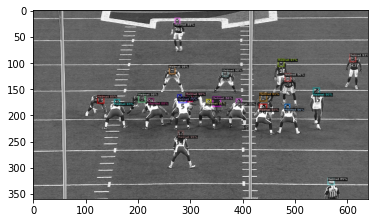

In [128]:
import matplotlib.pyplot as plt
plt.imshow(out.get_image()[:, :, ::-1])

In [129]:
v = Visualizer(img[:, :, ::-1],
                   metadata=MetadataCatalog.get('train'), 
                   scale=20, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
out1 = v.draw_instance_predictions(outputs["instances"].to("cpu"))

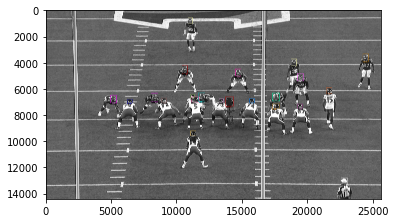

In [130]:
plt.imshow(out1.get_image()[:, :, ::-1])